## MODELOS DE SERIES DE TIMPO PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sympy import true
from datetime import datetime, timedelta
register_matplotlib_converters()
from time import time 


Vamos a leer el csv de Demanda en sector eléctrico

In [2]:
def parser(s):
    return datetime.strptime(s, '%m/%d/%Y')

In [4]:
demanda_electrico = pd.read_csv(R'Demanda_electrico_2022_full1.csv', parse_dates=[0], index_col=0, squeeze=true, date_parser=parser, encoding = 'utf-8')
demanda_electrico

C:\Users\sergi\AppData\Local\Temp\ipykernel_23528\2540285724.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  demanda_electrico = pd.read_csv(R'Demanda_electrico_2022_full1.csv', parse_dates=[0], index_col=0, squeeze=true, date_parser=parser, encoding = 'utf-8')


Date
2005-01-01    1819.58
2005-02-01    1895.33
2005-03-01    1765.86
2005-04-01    1642.70
2005-05-01    1895.54
               ...   
2022-05-01    3350.03
2022-06-01    3498.70
2022-07-01    3350.97
2022-08-01    3506.42
2022-09-01    3778.37
Name: Demanded_Gas, Length: 213, dtype: float64

Vamos a graficar los datos de demanda eléctrico desde 2005 hasta 2022

Text(0, 0.5, 'Demanda [MMpcd]')

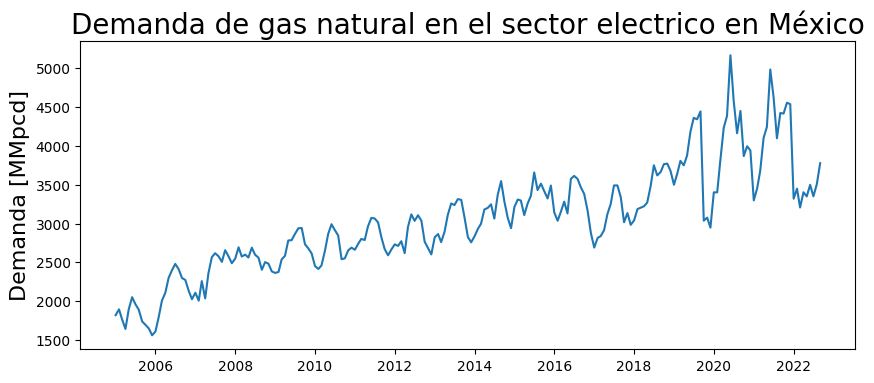

In [5]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico)
plt.title('Demanda de gas natural en el sector electrico en México', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se procede entonces a diferenciar la serie para lograr estacionariedad 

In [7]:
demanda_electrico_diff1 = demanda_electrico.diff()
demanda_electrico_diff1

Date
2005-01-01       NaN
2005-02-01     75.75
2005-03-01   -129.47
2005-04-01   -123.16
2005-05-01    252.84
               ...  
2022-05-01    -53.41
2022-06-01    148.67
2022-07-01   -147.73
2022-08-01    155.45
2022-09-01    271.95
Name: Demanded_Gas, Length: 213, dtype: float64

Se grafica la diferencia de demanda en el sector eléctrico 

Text(0, 0.5, ' Diferencia Demanda [MMpcd]')

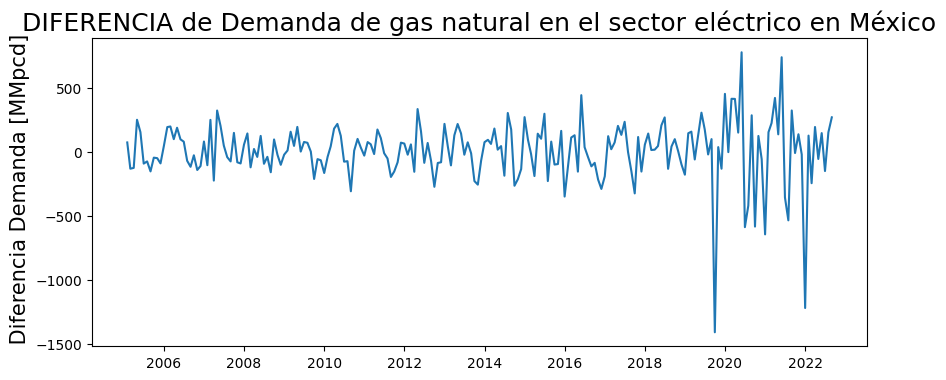

In [11]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_diff1)
plt.title('DIFERENCIA de Demanda de gas natural en el sector eléctrico en México', fontsize=18)
plt.ylabel(' Diferencia Demanda [MMpcd]', fontsize =15)

Se elaboran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México

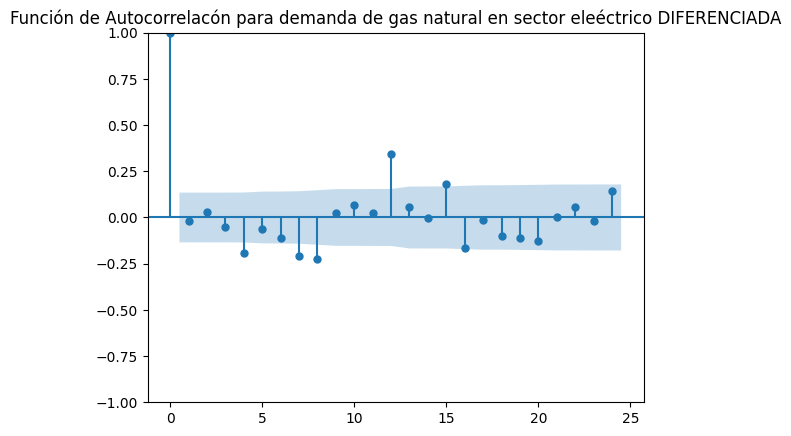

In [20]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico DIFERENCIADA")

# Show the plot
plt.show()

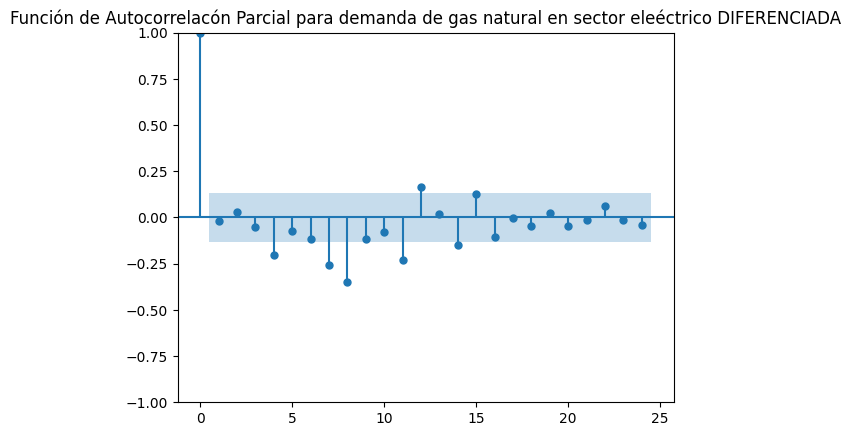

In [21]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eleéctrico DIFERENCIADA")

# Show the plot
plt.show()

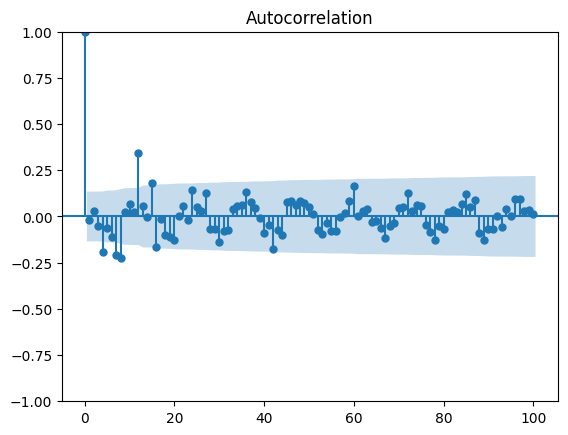

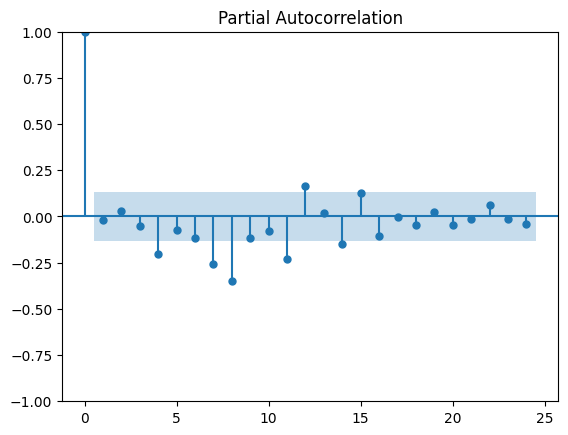

In [19]:
#Ploting the ACF for the ARIMA model (Autocorrelation function)
demanda_electrico_diff1_acf_plot = plot_acf(demanda_electrico_diff1.dropna(), lags=100)

#Ploting the PACF for the ARIMA model (Partial Autocorrelation function)
demanda_electrico_diff1_pacf_plot = plot_pacf(demanda_electrico_diff1.dropna())

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [13]:
## Get training and testing sets 
demanda_electrico_train_end = datetime(2021,9,1)
demanda_electrico_test_end = datetime(2022,9,1)
##This means we are taking from 2005 to 2018 as traning data to predict 2019 and 2020

demanda_electrico_train_data = demanda_electrico[:demanda_electrico_train_end]
demanda_electrico_test_data = demanda_electrico[demanda_electrico_train_end+ timedelta(days=1):demanda_electrico_test_end]
demanda_electrico_test_data


Date
2021-10-01    4417.51
2021-11-01    4557.36
2021-12-01    4538.89
2022-01-01    3320.75
2022-02-01    3449.80
2022-03-01    3206.96
2022-04-01    3403.44
2022-05-01    3350.03
2022-06-01    3498.70
2022-07-01    3350.97
2022-08-01    3506.42
2022-09-01    3778.37
Name: Demanded_Gas, dtype: float64